# Ejercicio 3: Clasificación de videojuegos por popularidad. | Bosques aleatorios (Random Forest)

Julieta Melina Flores Morán

#### **Descripción**:
Clasifica videojuegos como "muy populares", "moderadamente populares" o "menos
populares" basándote en ventas, calificaciones y datos de usuarios activos

#### **Pasos:**
- Usa el dataset de [Video Game Sales](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) en Kaggle.
- Limpia los datos.
- Analiza las variables más importantes para la clasificación
- Aplica Random Forest para clasificar y analiza la importancia de las característica
- Presenta los resultados con gráficos y presenta tu análisis

Lo primero que hacemos es cargar el dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Leemos el dataset que tenemos como csv
file = "vgchartz-2024.csv"
df = pd.read_csv(file)

In [3]:
# información básica del dataset
df.shape

(64016, 14)

In [4]:
print('==========Carácteristicas=======')
df.info()

==========Carácteristicas=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [5]:
numericas = df.select_dtypes(include=['number'])
categoricas =  df.select_dtypes(include=['object'])
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [6]:
categoricas.describe()

,img,title,console,genre,publisher,developer,release_date,last_update
count,64016,64016,64016,64016,64016,63999,56965,17879
unique,56177,39798,81,20,3383,8862,7922,1545
top,/games/boxart/default.jpg,Plants vs. Zombies,PC,Misc,Unknown,Unknown,1994-01-01,2018-01-06
freq,7810,17,12617,9304,8842,4435,515,165


In [7]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


Empezamos con la limpieza de los datos:
- Eliminar duplicados
- Manejar valores faltantes
- Normalizar
- Transformar variables categoricas
  

Notamos que la columna de imágen contiene rutas a imagenes que no podemos analizar en este ejercicio. Por lo tanto la eliminamos pues no nos proporciona información relevante.

In [8]:
# Eliminamos columna img
df.drop('img', axis=1, inplace=True)

In [9]:
# Eliminación de duplicados
df.duplicated().any()

True

In [10]:
df.duplicated().sum()

18

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Manejar valores faltantes: Primero analizaremos si hay valores faltantes en cada columna
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57320
total_sales     45079
na_sales        51361
jp_sales        57275
pal_sales       51174
other_sales     48870
release_date     7051
last_update     46120
dtype: int64

In [13]:
print('Porcentaje de datos nulos por columna')
(df.isnull().sum() / len(df)) * 100

Porcentaje de datos nulos por columna


title            0.000000
console          0.000000
genre            0.000000
publisher        0.000000
developer        0.026563
critic_score    89.565299
total_sales     70.438139
na_sales        80.254070
jp_sales        89.494984
pal_sales       79.961874
other_sales     76.361761
release_date    11.017532
last_update     72.064752
dtype: float64

Podemos ver si la columna de total sales se puede rellenar con las regionales

In [14]:
print(df['total_sales'].isnull().sum())

df['total_sales'] = df.apply(
    lambda row: (row['na_sales'] if pd.notnull(row['na_sales']) else 0) + 
                (row['jp_sales'] if pd.notnull(row['jp_sales']) else 0) + 
                (row['pal_sales'] if pd.notnull(row['pal_sales']) else 0) + 
                (row['other_sales'] if pd.notnull(row['other_sales']) else 0) 
                if pd.isnull(row['total_sales']) and 
                   (pd.notnull(row['na_sales']) or pd.notnull(row['jp_sales']) or pd.notnull(row['pal_sales']) or pd.notnull(row['other_sales']))
                else row['total_sales'],
    axis=1
)

print(df['total_sales'].isnull().sum())


45079
45079


Notamos que las filas con ventas regionales no aportan información adicional a las de ventas totales, entonces optamos por eliminarlas y centrarnos en las ventas totales.

In [15]:
df.drop(['pal_sales', 'na_sales', 'other_sales', 'jp_sales'], axis=1, inplace=True)

```critic_score```  y  ```total_sales``` son columnas escenciales para el analisis de popularidad, pero tienen un gran numero de valores nulos,  por lo tanto optaremos por imputar los datos promedio

In [16]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())
df['total_sales'] = df['total_sales'].fillna(df['total_sales'].median())

La columna ```last_update```  tiene un porcentaje elevado de valores faltantes y no considero que afecte en el anális de popularidad así que optaré por eliminarla.

In [17]:
df.drop('last_update', axis=1, inplace=True)
df.drop('release_date', axis=1, inplace=True)

Finalmente creamos una categoria desconocido para los valores faltantes de ```developer```  y ```release_date``` 

In [18]:
df['developer'] = df['developer'].fillna('Desconocido')

In [19]:
print('Porcentaje de datos nulos por columna')
(df.isnull().sum() / len(df)) * 100

Porcentaje de datos nulos por columna


title           0.0
console         0.0
genre           0.0
publisher       0.0
developer       0.0
critic_score    0.0
total_sales     0.0
dtype: float64

A mi parecer las columnas mas relevantes para la clasififación son console, genre, publisher, developer   , critic_score, release_date  las cuales afectan a total_sales que define la popularidad del juego con los usurios

In [20]:
# Definir los percentiles para clasificar
percentil_uno = df['total_sales'].quantile(0.10)  # 10% menos popular
percentil_dos = df['total_sales'].quantile(0.90)  # 10% más popular

# Función para clasificar la popularidad
def clasificar_popularidad(fila):
    if fila['total_sales'] > percentil_dos:
        return 2
    elif fila['total_sales'] > percentil_uno:
        return 1
    else:
        return 0

# Aplicar la función a cada fila y crear la columna 'popularity'
df['popularity'] = df.apply(clasificar_popularidad, axis=1)
df['popularity'].value_counts()

popularity
1    50649
0     6969
2     6380
Name: count, dtype: int64

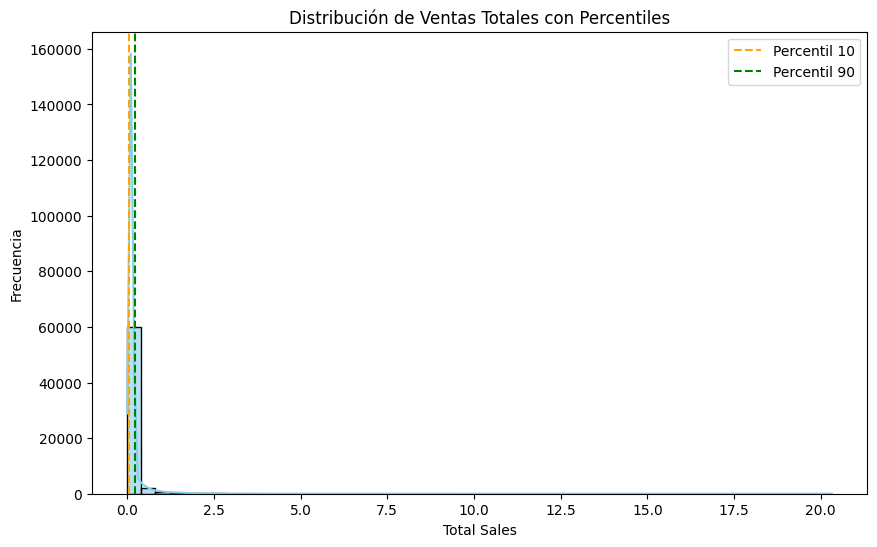

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales'], bins=50, kde=True, color='skyblue', alpha=0.6)
plt.axvline(percentil_uno, color='orange', linestyle='--', label='Percentil 10')
plt.axvline(percentil_dos, color='green', linestyle='--', label='Percentil 90')
plt.title('Distribución de Ventas Totales con Percentiles')
plt.xlabel('Total Sales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [22]:
# ya no neceitamos total_sales 
df.drop('total_sales', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)

<Axes: xlabel='popularity', ylabel='critic_score'>

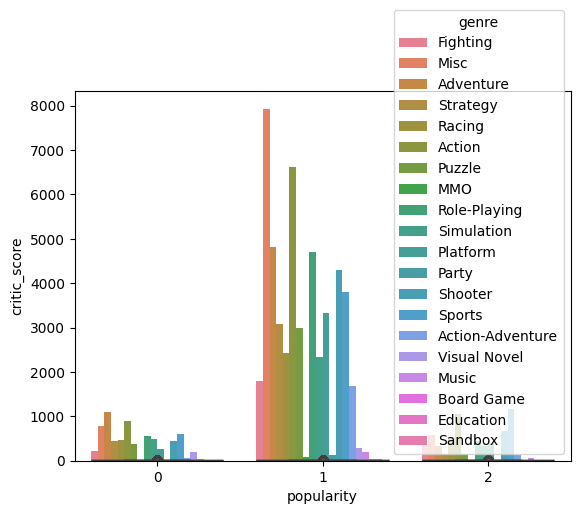

In [23]:
sns.boxplot(x='popularity', y='critic_score', data=df)
sns.countplot(x='popularity', hue='genre', data=df)


In [24]:
#codificamos y normalizamos
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])  
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 63998 entries, 0 to 64015
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   console       63998 non-null  int64  
 1   genre         63998 non-null  int64  
 2   publisher     63998 non-null  int64  
 3   developer     63998 non-null  int64  
 4   critic_score  63998 non-null  float64
 5   popularity    63998 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.4 MB


In [27]:
popularity = df['popularity']
cols = df.select_dtypes(include=['number']).columns
cols = cols.drop('popularity') 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols])
df[cols] = df_scaled 
df['popularity'] = popularity
df.describe()

,console,genre,publisher,developer,critic_score,popularity
count,6.399800e+04,6.399800e+04,6.399800e+04,6.399800e+04,6.399800e+04,63998.000000
mean,-1.403366e-16,-2.842260e-17,-6.217443e-17,-1.314545e-16,1.317210e-15,0.990797
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.456622
min,-2.577462e+00,-1.515729e+00,-1.749798e+00,-1.792466e+00,-1.352783e+01,0.000000
25%,-3.234009e-01,-1.188393e+00,-9.324599e-01,-9.203178e-01,6.098499e-02,1.000000
50%,5.227607e-02,1.209492e-01,1.016841e-01,6.507206e-02,6.098499e-02,1.000000
75%,5.352893e-01,9.392883e-01,9.660290e-01,9.383723e-01,6.098499e-02,1.000000
max,1.715988e+00,1.593960e+00,1.494613e+00,1.609374e+00,5.287453e+00,2.000000


<Axes: >

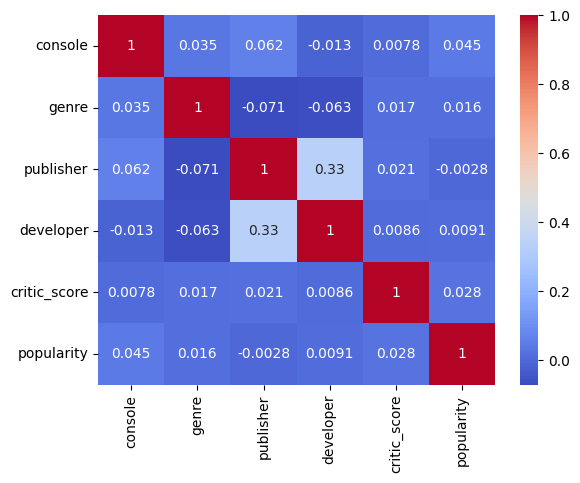

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [29]:
df.corr()

,console,genre,publisher,developer,critic_score,popularity
console,1.000000,0.035209,0.061975,-0.013099,0.007761,0.044979
genre,0.035209,1.000000,-0.070670,-0.062927,0.017114,0.016347
publisher,0.061975,-0.070670,1.000000,0.332078,0.020715,-0.002790
developer,-0.013099,-0.062927,0.332078,1.000000,0.008645,0.009055
critic_score,0.007761,0.017114,0.020715,0.008645,1.000000,0.028489
popularity,0.044979,0.016347,-0.002790,0.009055,0.028489,1.000000


In [30]:
# modelo
X = df.drop([ 'popularity'], axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [ ]:
# Evaluación del modelo
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Precisión del Modelo:\n", accuracy_score(y_test, y_pred))

# Importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características en Random Forest')
plt.show()
